In [1]:
import torch 
import pandas as pd 
import sys 
sys.path.append('../')
import requests 
from PIL import Image 
from modules.Cleaner import * 
from modules.Preprcoess import * 
from modules.utils import * 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torchvision
from torch.optim.lr_scheduler import LambdaLR
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn 
from tqdm import tqdm
import json
import multiprocessing
import os
import torch
from torch import nn
from d2l import torch as d2l

(d2l form 动手学机器学习)

In [2]:
# d2l.DATA_HUB['bert.base'] = (d2l.DATA_URL + 'bert.base.torch.zip', '225d66f04cae318b841a13d32af3acc165f253ac')
# d2l.DATA_HUB['bert.small'] = (d2l.DATA_URL + 'bert.small.torch.zip','c72329e68a732bef0452e4b96a1c341c8910f81f')

In [3]:
# def load_pretrained_model(pretrained_model, num_hiddens, ffn_num_hiddens,
#                           num_heads, num_layers, dropout, max_len, devices):
#     data_dir = d2l.download_extract(pretrained_model)
#     # 定义空词表以加载预定义词表
#     vocab = d2l.Vocab()
#     vocab.idx_to_token = json.load(open(os.path.join(data_dir,
#         'vocab.json')))
#     vocab.token_to_idx = {token: idx for idx, token in enumerate(
#         vocab.idx_to_token)}
#     bert = d2l.BERTModel(len(vocab), num_hiddens, norm_shape=[256],
#                          ffn_num_input=256, ffn_num_hiddens=ffn_num_hiddens,
#                          num_heads=4, num_layers=2, dropout=0.2,
#                          max_len=max_len, key_size=256, query_size=256,
#                          value_size=256, hid_in_features=256,
#                          mlm_in_features=256, nsp_in_features=256)
#     # 加载预训练BERT参数
#     bert.load_state_dict(torch.load(os.path.join(data_dir,
#                                                  'pretrained.params')))
#     return bert, vocab

In [4]:
# devices = d2l.try_all_gpus()
# bert, vocab = load_pretrained_model(
#     'bert.small', num_hiddens=256, ffn_num_hiddens=512, num_heads=4,
#     num_layers=2, dropout=0.1, max_len=512, devices=devices)

In [5]:
import  pickle

with open('../raw_data/pretrained_df.pkl','rb') as handle:
    df = pickle.load(handle)


In [6]:
import pandas as pd
pd.__version__

'1.4.1'

In [7]:
# This is quite important because not all images exist 
import os 
dir_list = os.listdir('../images/')
dir_list = [os.path.splitext(filename)[0] for filename in dir_list]

exist = pd.DataFrame(dir_list)
exist.columns = ['asin']

df = df.merge(exist,how='inner',on=['asin'])

In [8]:
df

,asin,reviewText,overall,imUrl,description,descriptions,review_vec
0,0700026657,"This game is a bit hard to get the hang of, bu...",5.0,[https://images-na.ssl-images-amazon.com/image...,[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,ANNO 2070BRAND NEW - IN STOCKDVD Rom Software ...,"[0.12231445, 0.067342125, -0.12666829, 0.15683..."
1,0700026657,I played it a while but it was alright. The st...,4.0,[https://images-na.ssl-images-amazon.com/image...,[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,ANNO 2070BRAND NEW - IN STOCKDVD Rom Software ...,"[0.08287811, 0.1084493, 0.009897868, 0.0906804..."
2,0700026657,ok game.,3.0,[https://images-na.ssl-images-amazon.com/image...,[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,ANNO 2070BRAND NEW - IN STOCKDVD Rom Software ...,"[0.05834198, 0.021972656, 0.014556885, 0.07939..."
3,0700026657,"found the game a bit too complicated, not what...",2.0,[https://images-na.ssl-images-amazon.com/image...,[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,ANNO 2070BRAND NEW - IN STOCKDVD Rom Software ...,"[0.09651693, 0.1222229, -0.03926595, 0.0629526..."
4,0700026657,"great game, I love it and have played it since...",5.0,[https://images-na.ssl-images-amazon.com/image...,[ANNO 2070BRAND NEW - IN STOCKDVD Rom Software...,ANNO 2070BRAND NEW - IN STOCKDVD Rom Software ...,"[0.079818726, 0.118774414, 0.037200928, 0.0314..."
...,...,...,...,...,...,...,...
436764,B01H7VI5TC,"These work 100% as advertised, but the connect...",4.0,[https://images-na.ssl-images-amazon.com/image...,[Two 6ft N64 Extension Cables],Two 6ft N64 Extension Cables,"[0.0201527, -0.0009987571, -0.07744806, 0.0880..."
436765,B01H7VI5TC,Totaly needed these works great. I can play fr...,5.0,[https://images-na.ssl-images-amazon.com/image...,[Two 6ft N64 Extension Cables],Two 6ft N64 Extension Cables,"[0.015492757, 0.018920898, 0.06870524, 0.07133..."
436766,B01H7VI5TC,Item works at it should. Recommend for those n...,5.0,[https://images-na.ssl-images-amazon.com/image...,[Two 6ft N64 Extension Cables],Two 6ft N64 Extension Cables,"[0.05632867, -0.013244629, 0.017493354, 0.0933..."
436767,B01H7VI5TC,It is good buy.,5.0,[https://images-na.ssl-images-amazon.com/image...,[Two 6ft N64 Extension Cables],Two 6ft N64 Extension Cables,"[0.05041504, -0.05810547, -0.05731201, 0.17700..."


In [9]:
#sampled from whole data for balanced rate distribution
upper = df.loc[df.overall==5].sample(frac=.08)
unchange = df.loc[df.overall==4].sample(frac=.2)
unchange2 = df.loc[df.overall==3].sample(frac=.4)
low = df.loc[(df.overall<3)].sample(frac=0.8, replace=True)
df_sampled = pd.concat([upper,unchange,low,unchange2],axis=0).sample(frac=1)
df_sampled.overall.value_counts()

1.0    21581
5.0    20976
3.0    17370
2.0    17173
4.0    16539
Name: overall, dtype: int64

In [10]:
df_sampled.keys()

Index(['asin', 'reviewText', 'overall', 'imUrl', 'description', 'descriptions',
       'review_vec'],
      dtype='object')

## 1.Exploratory data analysis

In [11]:
uni_asin_val,uni_rev_val,uni_ovl_val= df_sampled['asin'].unique(),df_sampled['reviewText'].unique(),df_sampled['overall'].unique()

In [12]:
len(uni_asin_val),len(uni_rev_val),len(uni_ovl_val)

(10982, 72918, 5)

In [13]:
len(df_sampled)

93639

In [14]:
df_sampled['overall'].unique()

array([5., 2., 3., 1., 4.])

In [15]:
len(df)

436769

## 2. data process

In [16]:
#gensim library to load pre-trained Word2Vec word embeddings from the Google News dataset.
# import gensim
# w2v = gensim.models.KeyedVectors.load_word2vec_format('../components/GoogleNews-vectors-negative300.bin', binary=True)

### import essential package

In [17]:
## import essential package
import numpy as np
import pandas as pd
import random
import json, time 
from tqdm import tqdm 
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertConfig, AdamW, get_cosine_schedule_with_warmup
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

# set seed
seed = 666
random.seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.manual_seed(seed)

### import pretrianed model

In [18]:
#download distilBERT as the model has fewer paras and relatively comparable performance as bert
#for DistilBERT
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### data preprosessing tokenizer

In [19]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [20]:
# dec_length_dic={}
# ext_lis_dec=[]
# for ind,i in enumerate(list_tokenized_train_dec.values):
#     if len(i) not in dec_length_dic:
#         dec_length_dic[len(i)]=1
#     else:
#         dec_length_dic[len(i)]+=1
#     if len(i)>500:
#         ext_lis_dec.append(ind)
        
# rev_length_dic={}
# ext_lis_rev=[]
# for ind,i in enumerate(list_tokenized_train_rev.values):
#     if len(i) not in rev_length_dic:
#         rev_length_dic[len(i)]=1
#     else:
#         rev_length_dic[len(i)]+=1
#     if len(i)>500:
#         ext_lis_rev.append(ind)

In [21]:
# dec_length_lis=[]
# for i in range(max_len_dec):
#     if i in dec_length_dic:
#         dec_length_lis.append(dec_length_dic[i])
#     else:
#         dec_length_lis.append(0)
    

In [22]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plt.plot(range(max_len_dec),np.cumsum(np.array(dec_length_lis)))
# plt.show()

In [23]:
# np.cumsum(np.array(dec_length_lis))[400]

In [24]:
# np.cumsum(np.array(dec_length_lis))[5000]

In [25]:
# rev_length_lis=[]
# for i in range(max_len_rev):
#     if i in rev_length_dic:
#         rev_length_lis.append(rev_length_dic[i])
#     else:
#         rev_length_lis.append(0)

In [26]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plt.plot(range(max_len_rev),np.cumsum(np.array(rev_length_lis)))
# plt.show()

In [27]:
# np.cumsum(np.array(rev_length_lis))[1000]

In [28]:
if not os.path.exists("test.npy"):
    #pad all into same length
    max_len_dec=50
    ## Masking
    # The value 0 for attention_mask (aka input_mask) only works on the padding section
    # np.where(condition, x, y) outputs x if condition is met, y if not
    # padded_dec=np.array([i + [0] * (max_len_dec - len(i)) if len(i)==max_len_dec else i for i in list_tokenized_train_dec.values ])
    # attention_mask_dec=np.where(padded_dec !=0,1,0)

    max_len_rev=462

    # padded_rev=np.array([i + [0] * (max_len_rev- len(i)) if len(i)==max_len_rev else i  for i in list_tokenized_train_rev.values])
    # attention_mask_rev=np.where(padded_rev !=0,1,0)
    input_ids_dec,input_ids_rev,input_masks_dec, input_masks_rev=[],[],[],[]
    labels_dec,labels_rev=[],[]
    for ind, sen in enumerate(list(df_sampled.descriptions)):
        encode_dict= tokenizer.encode_plus(text=sen, max_length=max_len_dec, padding="max_length",truncation=True)
        input_ids_dec.append(encode_dict['input_ids'])
        input_masks_dec.append(encode_dict['attention_mask'])
    for ind, sen in enumerate(list(df_sampled.reviewText)):
        encode_dict= tokenizer.encode_plus(text=sen, max_length=max_len_rev, padding="max_length",truncation=True)
        input_ids_rev.append(encode_dict['input_ids'])
        input_masks_rev.append(encode_dict['attention_mask'])    
    labels=list(df_sampled['overall'])
    asin= list(df_sampled['asin'])
    input_ids_dec, input_masks_dec,input_ids_rev, input_masks_rev = np.array(input_ids_dec), np.array(input_masks_dec),np.array(input_ids_rev), np.array(input_masks_rev)
    labels,asin = np.array(labels),np.array(asin)
    
    #torch.cuda.empty_cache()
    # random set order
    total_num=input_ids_dec.shape[0]
    idxes = np.arange(total_num)
    np.random.shuffle(idxes)
    print(idxes.shape, idxes[:10])
    train_ratio,val_ratio,test_ratio=0.8,0.1,0.1
    #generate file, long time to go
    # 8:1:1 to train set, validation set and test set
    input_ids_dec_train, input_ids_dec_valid, input_ids_dec_test = input_ids_dec[idxes[:int(total_num*train_ratio)]], input_ids_dec[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], input_ids_dec[idxes[-int(total_num* test_ratio):]]
    input_masks_dec_train, input_masks_dec_valid, input_masks_dec_test = input_masks_dec[idxes[:int(total_num*train_ratio)]], input_masks_dec[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], input_masks_dec[idxes[-int(total_num* test_ratio):]]

    input_ids_rev_train, input_ids_rev_valid, input_ids_rev_test = input_ids_rev[idxes[:int(total_num*train_ratio)]], input_ids_rev[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], input_ids_rev[idxes[-int(total_num* test_ratio):]]
    input_masks_rev_train, input_masks_rev_valid, input_masks_rev_test = input_masks_rev[idxes[:int(total_num*train_ratio)]], input_masks_rev[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], input_masks_rev[idxes[-int(total_num* test_ratio):]]
    y_train, y_valid, y_test = labels[idxes[:int(total_num*train_ratio)]], labels[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], labels[idxes[-int(total_num* test_ratio):]]
    asin_train, asin_valid, asin_test = asin[idxes[:int(total_num*train_ratio)]], asin[idxes[int(total_num*train_ratio):int(total_num*(train_ratio+val_ratio))]], asin[idxes[-int(total_num* test_ratio):]]
    print(input_ids_dec_train.shape, y_train.shape, input_ids_rev_valid.shape, y_valid.shape, 
          input_ids_dec_test.shape, y_test.shape)
    save_list=[input_ids_dec_train, input_ids_dec_valid, input_ids_dec_test,input_masks_dec_train, input_masks_dec_valid, input_masks_dec_test,
    input_ids_rev_train, input_ids_rev_valid, input_ids_rev_test,input_masks_rev_train, input_masks_rev_valid, input_masks_rev_test,
    y_train, y_valid, y_test,asin_train, asin_valid, asin_test]
    with open('test.npy','wb') as f:
        for arr in save_list:
            np.save(f,arr)
else:
    with open('test.npy', 'rb') as f:
        input_ids_dec_train=np.load(f)
        input_ids_dec_valid=np.load(f)
        input_ids_dec_test=np.load(f)
        input_masks_dec_train=np.load(f)
        input_masks_dec_valid=np.load(f)
        input_masks_dec_test=np.load(f)
        input_ids_rev_train=np.load(f)
        input_ids_rev_valid=np.load(f)
        input_ids_rev_test=np.load(f)
        input_masks_rev_train=np.load(f)
        input_masks_rev_valid=np.load(f)
        input_masks_rev_test=np.load(f)
        y_train=np.load(f)
        y_valid=np.load(f)
        y_test=np.load(f)
        asin_train=np.load(f)
        asin_valid=np.load(f)
        asin_test=np.load(f)

In [29]:
#data agumentation step
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(3.0 / 4.0, 4.0 / 3.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class ReviewDataSet(Dataset):
    def __init__(self, dec_ids,masks_dec, ids_rev, masks_rev,asin,rating, transform):
        self.dec_ids = dec_ids
        self.masks_dec = masks_dec
        self.ids_rev = ids_rev
        self.masks_rev= masks_rev
        self.asin=asin
        self.rating =rating
        self.transform = transform

    def __len__(self):
        return len(self.rating)

    def __getitem__(self, index):
        image_path = os.path.join('../images/', f"{self.asin[index]}.jpg")
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)
        dec_ids=self.dec_ids[index]
        masks_dec=self.masks_dec[index]
        ids_rev=self.ids_rev[index]
        masks_rev=self.masks_rev[index]
        rating = self.rating[index]
        return dec_ids,masks_dec,ids_rev,ids_rev,image,int(rating)

batch_size = 16

train_set = ReviewDataSet(input_ids_dec_train,input_masks_dec_train, input_ids_rev_train, input_masks_rev_train,asin_train,y_train, transform=train_transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)

valid_set = ReviewDataSet(input_ids_dec_valid,input_masks_dec_valid, input_ids_rev_valid, input_masks_rev_valid,asin_valid,y_valid, transform=test_transform)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)

test_set = ReviewDataSet(input_ids_dec_test,input_masks_dec_test, input_ids_rev_test, input_masks_rev_test,asin_test,y_test, transform=test_transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)


### BERT

In [30]:
#input_ids_dec= torch.LongTensor(padded_dec[0])

In [31]:
#attention_mask_rev


In [32]:
import torch
import torch.nn.functional as F


# class CIN(torch.nn.Module):
#     def __init__(self, input_dim, num_layers=2):
#         super(CIN, self).__init__()
#         # CIN 网络有几层，也就是要几阶
#         self.num_layers = num_layers
#         # 一维卷积层
#         self.conv_layers = torch.nn.ModuleList()
#         fc_input_dim = 0
#         for i in range(self.num_layers):
#             ''' in_channels: 输入信号的通道 向量的维度 ,input_dim的长度指的是特征的总数
#                 out_channels:卷积产生的通道。有多少个out_channels，就需要多少个1维卷积 
#                 kerner_size :卷积核的尺寸，卷积核的大小为(k,)，第二个维度是由in_channels来决定的，所以实际上卷积大小为kerner_size*in_channels
#                 stride : 卷积步长 
#                 dilation :卷积核元素之间的间距'''
#             self.conv_layers.append(
       
#                 torch.nn.Conv1d(in_channels=input_dim * input_dim, out_channels=input_dim, kernel_size=1,
#                                 stride=1, dilation=1, bias=True))
#             fc_input_dim += input_dim
#         self.fc = torch.nn.Linear(fc_input_dim, 1)

#     def forward(self, x):
#         xs = list()
#         '''举例  x.shape = [1,22,16] 1表示batch_size,表示有几维数据，22表示特征的维数，16是embedding层的向量大小
#         经过 x.unsqueeze(2)后 x.shape = [1,22,1,16]
#         经过 x.unsqueeze(1)后 x.shape = [1,1,22,16]  
#         x.unsqueeze(2) * x.unsqueeze(1) 后   x.shape =[1,22,22,16]
#         进过卷积层后变为 x.shape =[1,16,16]
#         经过 sum pooling  变为 1维
#          '''
#         x0, h = x.unsqueeze(2), x
#         for i in range(self.num_layers):
#             h1 = h.unsqueeze(1)
#             x = x0 * h1
#             batch_size, f0_dim, fin_dim, embed_dim = x.shape
#             x = x.view(batch_size, f0_dim * fin_dim, embed_dim)
#             x = F.relu(self.conv_layers[i](x))
#             h = x
#             xs.append(x)
#         return self.fc(torch.sum(torch.cat(xs, dim=1), 2))

In [33]:
import torch
import torch.nn as nn
from transformers import DistilBertModel, DistilBertTokenizer
torch.cuda.empty_cache()
# base_model = torchvision.models.efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.DEFAULT)
base_model = torchvision.models.mobilenet_v3_small(pretrained=True) #this should be smaller imo
# Remove the last fully connected layer from the base_model
base_model.classifier = nn.Sequential(*list(base_model.classifier.children())[:-1])

class Multi_model(nn.Module):
    def __init__(self, bert_path):
        super(Multi_model, self).__init__()

        # DistilBERT for text encoding
        self.config = DistilBertConfig.from_pretrained(bert_path) 
        # mobile_net
        self.mobile_net = base_model
        self.bert = model_class.from_pretrained(bert_path) #Load pre-trained model weights
        #self.bert2 = model_class.from_pretrained(bert_path) #Load pre-trained model weights
        
        # Self-attention for image
        # CIN
            


        # Classifier
        self.fc = nn.Sequential(
            nn.Linear(1792, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
#         input_dim=1792
#         self.num_layers =  2
#         # 一维卷积层
#         self.conv_layers = torch.nn.ModuleList()
#         fc_input_dim = 0
#         for i in range(self.num_layers):
#             self.conv_layers.append(
    
#                 torch.nn.Conv1d(in_channels=input_dim * input_dim, out_channels=input_dim, kernel_size=1,
#                                 stride=1, dilation=1, bias=True))
#             fc_input_dim += input_dim
        #self.fc = torch.nn.Linear(fc_input_dim, 1)
    def forward(self, inds_dec, masks_dec, inds_rev, masks_rev,  i):
        # Text encoding with DistilBERT
        inds=torch.cat((inds_dec, inds_rev), dim=-1)
        #print(f"ind dim is {inds.shape}")
        masks=torch.cat((masks_dec, masks_rev), dim=-1)
        #print(f"masks dim is {masks.shape}")
        output = self.bert(inds,masks) ## [batchsize, len, 768]
        #print(f"1dec_output shape is {dec_output.shape}")
        #print(f"inds_rev masks_rev shape is {inds_rev.shape, masks_rev.shape}")
        #rev_output = self.bert2(inds_rev, masks_rev)
        #print(f'output is {output}')
        output = output[0][:, 0, :]  ##池化后的输出 [bs, config.hidden_size]
        #print(f'output is {output}')
        #print(f"2dec_output shape is {dec_output.shape}") #dec_output shape is torch.Size([16, 768])
        #rev_output = rev_output[0][:, 0, :]
        #print(f"2rev_output shape is {rev_output.shape}")
        # Image encoding with self-attention and pooling
        image_features = self.mobile_net(i)
        #print('shape of image_features')
        
        #print(f'output,image_features is {output.shape}{image_features.shape}')
        
        # Concatenate features
        output = torch.cat((output, image_features),  dim=-1)
        
        #output=rev_output
        #print(f"output shape is {output.shape}")
        # Predictions
        predictions = self.fc(output)*5## [bs, classes] 
        #print(f'predictions is {predictions}')

        return predictions.squeeze(-1)


In [34]:
def get_parameter_number(model):
    #  get the size of parms
    total_num = sum(p.numel() for p in model.parameters())
    trainable_num = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return 'Total parameters: {}, Trainable parameters: {}'.format(total_num, trainable_num)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Multi_model(pretrained_weights).to(device)
#only let the model train the last layer and fc layer
unfreeze_layers=['layer.10','layer.5','bert.pooler','fc',"features.11"]
# for name, param in model.named_parameters():
#     print(name,param.size())
for name ,param in model.named_parameters():
    param.requires_grad = False
    for ele in unfreeze_layers:
        if ele in name and "mobile_net" not in name:
            #print(ele)
            param.requires_grad = True
            break
#model=torch.load('full_model.pth').to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
print(get_parameter_number(model))

Total parameters: 68800289, Trainable parameters: 8007425


In [36]:
name

'fc.4.bias'

In [37]:
ele

'fc'

In [38]:
for name, param in model.named_parameters():
    print(name,param.size())

mobile_net.features.0.0.weight torch.Size([16, 3, 3, 3])
mobile_net.features.0.1.weight torch.Size([16])
mobile_net.features.0.1.bias torch.Size([16])
mobile_net.features.1.block.0.0.weight torch.Size([16, 1, 3, 3])
mobile_net.features.1.block.0.1.weight torch.Size([16])
mobile_net.features.1.block.0.1.bias torch.Size([16])
mobile_net.features.1.block.1.fc1.weight torch.Size([8, 16, 1, 1])
mobile_net.features.1.block.1.fc1.bias torch.Size([8])
mobile_net.features.1.block.1.fc2.weight torch.Size([16, 8, 1, 1])
mobile_net.features.1.block.1.fc2.bias torch.Size([16])
mobile_net.features.1.block.2.0.weight torch.Size([16, 16, 1, 1])
mobile_net.features.1.block.2.1.weight torch.Size([16])
mobile_net.features.1.block.2.1.bias torch.Size([16])
mobile_net.features.2.block.0.0.weight torch.Size([72, 16, 1, 1])
mobile_net.features.2.block.0.1.weight torch.Size([72])
mobile_net.features.2.block.0.1.bias torch.Size([72])
mobile_net.features.2.block.1.0.weight torch.Size([72, 1, 3, 3])
mobile_net.f

In [39]:
# #验证一下
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name,param.size())

bert.transformer.layer.5.attention.q_lin.weight torch.Size([768, 768])
bert.transformer.layer.5.attention.q_lin.bias torch.Size([768])
bert.transformer.layer.5.attention.k_lin.weight torch.Size([768, 768])
bert.transformer.layer.5.attention.k_lin.bias torch.Size([768])
bert.transformer.layer.5.attention.v_lin.weight torch.Size([768, 768])
bert.transformer.layer.5.attention.v_lin.bias torch.Size([768])
bert.transformer.layer.5.attention.out_lin.weight torch.Size([768, 768])
bert.transformer.layer.5.attention.out_lin.bias torch.Size([768])
bert.transformer.layer.5.sa_layer_norm.weight torch.Size([768])
bert.transformer.layer.5.sa_layer_norm.bias torch.Size([768])
bert.transformer.layer.5.ffn.lin1.weight torch.Size([3072, 768])
bert.transformer.layer.5.ffn.lin1.bias torch.Size([3072])
bert.transformer.layer.5.ffn.lin2.weight torch.Size([768, 3072])
bert.transformer.layer.5.ffn.lin2.bias torch.Size([768])
bert.transformer.layer.5.output_layer_norm.weight torch.Size([768])
bert.transformer.

In [40]:
model

Multi_model(
  (mobile_net): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): C

In [41]:
# Hyperparameters  
n_epochs = 200
lr = 2e-5
best_loss = float('inf')
break_counter = 0 #early stopping 

# loss and optimizers 
criterion = nn.MSELoss()

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()) , lr=lr , weight_decay=1e-4)
# scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 1/(epoch+1))
scheduler=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=15)

# export beast model path: 
path = './model_image.pth'

# Metrics - for plotting later 
valid_acc_plot = []
train_acc_plot = []
valid_loss_plot = []
train_loss_plot = []

for epoch in range(n_epochs): 
    
    # enable training model 
    model.train() 
    train_loss = []
    train_accs = []
    
    # training loop
    for batch in tqdm(train_loader):
        
        # data points 
        inds_dec, masks_dec, inds_rev, masks_rev, i,rating = batch

        labels = rating.to(device).float()
        #print(f"inds, masks, inds_rev, masks_rev, i.shape.rating.shape is {inds_dec.shape} {masks_dec.shape} {inds_rev.shape} {masks_rev.shape} {i.shape} {rating.shape}")
        # Forward the data. (Make sure data and model are on the same device.)
        logits = model(inds_dec.to(device),masks_dec.to(device),inds_rev.to(device),masks_rev.to(device),i.to(device)).float()
        
        # loss 
        loss = criterion(logits, labels.to(device))

        # Gradients stored in the parameters in the previous step should be cleared out first.
        optimizer.zero_grad()

        # Compute the gradients for parameters.
        loss.backward()

        # Clip the gradient norms for stable training.
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=10)

        # Update the parameters with computed gradients.
        optimizer.step()
        scheduler.step()

        # Compute the accuracy for current batch.
        # acc = (logits.argmax(dim=-1) == labels.to(device)).float().mean()
        acc = sum(logits.round()==labels.to(device)).item()/len(labels)

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc)
    
    # The average loss and accuracy of the training set is the average of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    
    print(f"[ Train | {epoch + 1:03d}/{n_epochs:03d} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")
    
    # evaluation mode 
    model.eval()
    valid_loss = []
    valid_accs = []
    
    for batch in tqdm(valid_loader):
        inds_dec, masks_dec, inds_rev, masks_rev, i,rating = batch
        labels=  rating.to(device).float()       
        # We don't need gradient in validation.
        with torch.no_grad():
            
            logits = model(inds_dec.to(device),masks_dec.to(device),inds_rev.to(device),masks_rev.to(device),i.to(device)).float()

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels.to(device))

        # Compute the accuracy for current batch.
        acc = sum(logits.round()==labels.to(device)).item()/len(labels)

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc)

    # The average loss and accuracy for entire validation set is the average of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    
    # model saving 
    if valid_loss < best_loss:
        torch.save(model.state_dict(), path)
        best_loss = valid_loss 
        # resetting the counter 
        break_counter = 0
    else:
        break_counter += 1
        print(f'did not increase valid_loss. break counter now at {break_counter}')
        
    # early-stopping
    if break_counter > 100:
        print(f'overfitting at {epoch}')
        break
        
    # Print the information.
    print(f"[ Valid | {epoch + 1:03d}/{n_epochs:03d} ] loss = {valid_loss:.5f}, acc = {valid_acc:.5f}")
    
    valid_acc_plot.append(valid_acc)
    train_acc_plot.append(train_acc)
    valid_loss_plot.append(valid_loss)
    train_loss_plot.append(train_loss)

100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:35<00:00,  5.00it/s]


[ Train | 001/200 ] loss = 1.21353, acc = 0.38237


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.73it/s]


[ Valid | 001/200 ] loss = 0.84487, acc = 0.47792


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:33<00:00,  5.02it/s]


[ Train | 002/200 ] loss = 0.95768, acc = 0.43900


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


[ Valid | 002/200 ] loss = 0.78494, acc = 0.51045


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:22<00:00,  5.07it/s]


[ Train | 003/200 ] loss = 0.86235, acc = 0.45772


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.67it/s]


[ Valid | 003/200 ] loss = 0.74731, acc = 0.51408


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:18<00:00,  5.10it/s]


[ Train | 004/200 ] loss = 0.80666, acc = 0.47487


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.66it/s]


[ Valid | 004/200 ] loss = 0.73228, acc = 0.53157


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:17<00:00,  5.10it/s]


[ Train | 005/200 ] loss = 0.76860, acc = 0.48487


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


[ Valid | 005/200 ] loss = 0.69253, acc = 0.53264


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.02it/s]


[ Train | 006/200 ] loss = 0.73050, acc = 0.49675


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.73it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 006/200 ] loss = 0.69258, acc = 0.54565


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:19<00:00,  5.09it/s]


[ Train | 007/200 ] loss = 0.70387, acc = 0.50328


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:25<00:00,  6.82it/s]


[ Valid | 007/200 ] loss = 0.68389, acc = 0.55066


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 008/200 ] loss = 0.67692, acc = 0.51217


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


[ Valid | 008/200 ] loss = 0.67583, acc = 0.55141


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 009/200 ] loss = 0.65060, acc = 0.52064


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.61it/s]


[ Valid | 009/200 ] loss = 0.65433, acc = 0.56218


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 010/200 ] loss = 0.62803, acc = 0.52859


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


[ Valid | 010/200 ] loss = 0.64917, acc = 0.55109


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:26<00:00,  5.05it/s]


[ Train | 011/200 ] loss = 0.60348, acc = 0.53681


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


[ Valid | 011/200 ] loss = 0.63630, acc = 0.55663


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 012/200 ] loss = 0.58358, acc = 0.54271


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.71it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 012/200 ] loss = 0.64145, acc = 0.56453


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 013/200 ] loss = 0.55796, acc = 0.55082


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.80it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 013/200 ] loss = 0.65422, acc = 0.56890


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 014/200 ] loss = 0.54139, acc = 0.55969


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.63it/s]


[ Valid | 014/200 ] loss = 0.63416, acc = 0.57626


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 015/200 ] loss = 0.52069, acc = 0.56906


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.60it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 015/200 ] loss = 0.64449, acc = 0.56890


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [14:47<00:00,  5.28it/s]


[ Train | 016/200 ] loss = 0.50291, acc = 0.57398


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 016/200 ] loss = 0.65651, acc = 0.57167


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.03it/s]


[ Train | 017/200 ] loss = 0.48254, acc = 0.58356


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.80it/s]


[ Valid | 017/200 ] loss = 0.62424, acc = 0.57871


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 018/200 ] loss = 0.46923, acc = 0.59143


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.71it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 018/200 ] loss = 0.63061, acc = 0.58159


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:23<00:00,  5.07it/s]


[ Train | 019/200 ] loss = 0.45038, acc = 0.59871


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.66it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 019/200 ] loss = 0.64399, acc = 0.59226


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:18<00:00,  5.10it/s]


[ Train | 020/200 ] loss = 0.43429, acc = 0.60793


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 020/200 ] loss = 0.62441, acc = 0.58746


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:23<00:00,  5.07it/s]


[ Train | 021/200 ] loss = 0.41974, acc = 0.61299


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.67it/s]


[ Valid | 021/200 ] loss = 0.62119, acc = 0.59727


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:25<00:00,  5.06it/s]


[ Train | 022/200 ] loss = 0.40552, acc = 0.62092


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.74it/s]


[ Valid | 022/200 ] loss = 0.60648, acc = 0.59599


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:25<00:00,  5.06it/s]


[ Train | 023/200 ] loss = 0.39127, acc = 0.62540


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 023/200 ] loss = 0.61384, acc = 0.60335


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 024/200 ] loss = 0.38398, acc = 0.62979


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 024/200 ] loss = 0.60856, acc = 0.60442


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:25<00:00,  5.06it/s]


[ Train | 025/200 ] loss = 0.36816, acc = 0.63993


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.64it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 025/200 ] loss = 0.60859, acc = 0.60953


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:22<00:00,  5.08it/s]


[ Train | 026/200 ] loss = 0.35667, acc = 0.64645


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


[ Valid | 026/200 ] loss = 0.60051, acc = 0.61337


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 027/200 ] loss = 0.34780, acc = 0.65136


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


[ Valid | 027/200 ] loss = 0.59833, acc = 0.61039


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 028/200 ] loss = 0.33604, acc = 0.66064


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.75it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 028/200 ] loss = 0.61246, acc = 0.60922


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.04it/s]


[ Train | 029/200 ] loss = 0.33109, acc = 0.66287


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


[ Valid | 029/200 ] loss = 0.58997, acc = 0.62148


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 030/200 ] loss = 0.32188, acc = 0.66815


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.66it/s]


[ Valid | 030/200 ] loss = 0.58881, acc = 0.61956


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 031/200 ] loss = 0.31351, acc = 0.67556


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 031/200 ] loss = 0.60109, acc = 0.61764


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:26<00:00,  5.05it/s]


[ Train | 032/200 ] loss = 0.30161, acc = 0.68140


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 032/200 ] loss = 0.59396, acc = 0.62543


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 033/200 ] loss = 0.30021, acc = 0.68402


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.74it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 033/200 ] loss = 0.59777, acc = 0.62628


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 034/200 ] loss = 0.29132, acc = 0.69253


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


did not increase valid_loss. break counter now at 4
[ Valid | 034/200 ] loss = 0.59696, acc = 0.62500


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:25<00:00,  5.06it/s]


[ Train | 035/200 ] loss = 0.28439, acc = 0.69605


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.67it/s]


did not increase valid_loss. break counter now at 5
[ Valid | 035/200 ] loss = 0.59472, acc = 0.63108


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:26<00:00,  5.05it/s]


[ Train | 036/200 ] loss = 0.27871, acc = 0.70095


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:29<00:00,  6.58it/s]


did not increase valid_loss. break counter now at 6
[ Valid | 036/200 ] loss = 0.59612, acc = 0.62564


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:22<00:00,  5.07it/s]


[ Train | 037/200 ] loss = 0.27314, acc = 0.70537


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.71it/s]


did not increase valid_loss. break counter now at 7
[ Valid | 037/200 ] loss = 0.59565, acc = 0.63193


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 038/200 ] loss = 0.26389, acc = 0.71274


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.63it/s]


[ Valid | 038/200 ] loss = 0.58653, acc = 0.63279


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.03it/s]


[ Train | 039/200 ] loss = 0.26207, acc = 0.71462


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.80it/s]


[ Valid | 039/200 ] loss = 0.58519, acc = 0.63588


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 040/200 ] loss = 0.25375, acc = 0.72176


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.64it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 040/200 ] loss = 0.59107, acc = 0.63887


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:22<00:00,  5.07it/s]


[ Train | 041/200 ] loss = 0.24818, acc = 0.72454


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.59it/s]


[ Valid | 041/200 ] loss = 0.57802, acc = 0.64015


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.04it/s]


[ Train | 042/200 ] loss = 0.24686, acc = 0.72880


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:29<00:00,  6.55it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 042/200 ] loss = 0.57924, acc = 0.63727


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:33<00:00,  5.01it/s]


[ Train | 043/200 ] loss = 0.24208, acc = 0.72991


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.77it/s]


[ Valid | 043/200 ] loss = 0.57785, acc = 0.64015


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.02it/s]


[ Train | 044/200 ] loss = 0.23474, acc = 0.73452


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.77it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 044/200 ] loss = 0.58126, acc = 0.63780


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:32<00:00,  5.02it/s]


[ Train | 045/200 ] loss = 0.23366, acc = 0.73714


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 045/200 ] loss = 0.58512, acc = 0.64494


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:33<00:00,  5.02it/s]


[ Train | 046/200 ] loss = 0.22748, acc = 0.74359


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.70it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 046/200 ] loss = 0.57993, acc = 0.63908


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 047/200 ] loss = 0.22458, acc = 0.74732


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:29<00:00,  6.54it/s]


did not increase valid_loss. break counter now at 4
[ Valid | 047/200 ] loss = 0.58527, acc = 0.63972


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.04it/s]


[ Train | 048/200 ] loss = 0.22538, acc = 0.74757


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.65it/s]


[ Valid | 048/200 ] loss = 0.57489, acc = 0.64324


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:30<00:00,  5.03it/s]


[ Train | 049/200 ] loss = 0.22029, acc = 0.75230


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 049/200 ] loss = 0.58133, acc = 0.64441


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:23<00:00,  5.07it/s]


[ Train | 050/200 ] loss = 0.21666, acc = 0.75375


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.74it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 050/200 ] loss = 0.57664, acc = 0.64260


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:32<00:00,  5.02it/s]


[ Train | 051/200 ] loss = 0.21282, acc = 0.75874


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.70it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 051/200 ] loss = 0.60499, acc = 0.63695


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:26<00:00,  5.05it/s]


[ Train | 052/200 ] loss = 0.21056, acc = 0.76165


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


did not increase valid_loss. break counter now at 4
[ Valid | 052/200 ] loss = 0.57821, acc = 0.63993


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:23<00:00,  5.07it/s]


[ Train | 053/200 ] loss = 0.21196, acc = 0.75972


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:29<00:00,  6.57it/s]


did not increase valid_loss. break counter now at 5
[ Valid | 053/200 ] loss = 0.59243, acc = 0.64196


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:25<00:00,  5.06it/s]


[ Train | 054/200 ] loss = 0.20511, acc = 0.76893


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.65it/s]


did not increase valid_loss. break counter now at 6
[ Valid | 054/200 ] loss = 0.57888, acc = 0.64377


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 055/200 ] loss = 0.20114, acc = 0.77196


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:25<00:00,  6.83it/s]


did not increase valid_loss. break counter now at 7
[ Valid | 055/200 ] loss = 0.59233, acc = 0.64260


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.04it/s]


[ Train | 056/200 ] loss = 0.19901, acc = 0.77149


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.76it/s]


did not increase valid_loss. break counter now at 8
[ Valid | 056/200 ] loss = 0.58026, acc = 0.64793


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.04it/s]


[ Train | 057/200 ] loss = 0.19546, acc = 0.77668


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.70it/s]


did not increase valid_loss. break counter now at 9
[ Valid | 057/200 ] loss = 0.58584, acc = 0.64804


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [14:59<00:00,  5.20it/s]


[ Train | 058/200 ] loss = 0.19645, acc = 0.77503


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:19<00:00,  7.35it/s]


did not increase valid_loss. break counter now at 10
[ Valid | 058/200 ] loss = 0.57641, acc = 0.65102


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:30<00:00,  5.03it/s]


[ Train | 059/200 ] loss = 0.19101, acc = 0.78037


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.62it/s]


[ Valid | 059/200 ] loss = 0.57449, acc = 0.65220


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:37<00:00,  4.99it/s]


[ Train | 060/200 ] loss = 0.18828, acc = 0.78274


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.75it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 060/200 ] loss = 0.60062, acc = 0.64484


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:37<00:00,  4.99it/s]


[ Train | 061/200 ] loss = 0.18769, acc = 0.78500


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.68it/s]


[ Valid | 061/200 ] loss = 0.56769, acc = 0.65017


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:35<00:00,  5.01it/s]


[ Train | 062/200 ] loss = 0.18689, acc = 0.78525


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.73it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 062/200 ] loss = 0.57532, acc = 0.65156


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 063/200 ] loss = 0.18469, acc = 0.79002


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.69it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 063/200 ] loss = 0.60116, acc = 0.64366


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:30<00:00,  5.03it/s]


[ Train | 064/200 ] loss = 0.18416, acc = 0.78931


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:29<00:00,  6.56it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 064/200 ] loss = 0.57765, acc = 0.64889


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 065/200 ] loss = 0.18095, acc = 0.79306


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.63it/s]


did not increase valid_loss. break counter now at 4
[ Valid | 065/200 ] loss = 0.58253, acc = 0.64761


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 066/200 ] loss = 0.17650, acc = 0.79648


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.74it/s]


[ Valid | 066/200 ] loss = 0.56645, acc = 0.64814


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 067/200 ] loss = 0.17715, acc = 0.79924


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.77it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 067/200 ] loss = 0.57979, acc = 0.65028


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:34<00:00,  5.01it/s]


[ Train | 068/200 ] loss = 0.17679, acc = 0.79779


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.73it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 068/200 ] loss = 0.57347, acc = 0.64868


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:33<00:00,  5.02it/s]


[ Train | 069/200 ] loss = 0.17454, acc = 0.80116


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.75it/s]


[ Valid | 069/200 ] loss = 0.56232, acc = 0.64964


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 070/200 ] loss = 0.17200, acc = 0.80274


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


[ Valid | 070/200 ] loss = 0.56166, acc = 0.65198


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:24<00:00,  5.06it/s]


[ Train | 071/200 ] loss = 0.17390, acc = 0.80262


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.71it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 071/200 ] loss = 0.57923, acc = 0.64857


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.03it/s]


[ Train | 072/200 ] loss = 0.17002, acc = 0.80589


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.75it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 072/200 ] loss = 0.56621, acc = 0.65390


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:27<00:00,  5.05it/s]


[ Train | 073/200 ] loss = 0.16767, acc = 0.80900


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:25<00:00,  6.84it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 073/200 ] loss = 0.57231, acc = 0.65273


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:30<00:00,  5.03it/s]


[ Train | 074/200 ] loss = 0.16711, acc = 0.80872


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


[ Valid | 074/200 ] loss = 0.55923, acc = 0.65412


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:30<00:00,  5.03it/s]


[ Train | 075/200 ] loss = 0.16595, acc = 0.81142


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.61it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 075/200 ] loss = 0.57419, acc = 0.65358


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:32<00:00,  5.02it/s]


[ Train | 076/200 ] loss = 0.16181, acc = 0.81629


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.62it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 076/200 ] loss = 0.57504, acc = 0.65230


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 077/200 ] loss = 0.16261, acc = 0.81549


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.72it/s]


[ Valid | 077/200 ] loss = 0.55800, acc = 0.65582


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:29<00:00,  5.03it/s]


[ Train | 078/200 ] loss = 0.15894, acc = 0.81880


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.80it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 078/200 ] loss = 0.56614, acc = 0.65124


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.03it/s]


[ Train | 079/200 ] loss = 0.16006, acc = 0.81907


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.80it/s]


[ Valid | 079/200 ] loss = 0.55719, acc = 0.65433


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:28<00:00,  5.04it/s]


[ Train | 080/200 ] loss = 0.15913, acc = 0.82219


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:26<00:00,  6.75it/s]


did not increase valid_loss. break counter now at 1
[ Valid | 080/200 ] loss = 0.56514, acc = 0.65358


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:32<00:00,  5.02it/s]


[ Train | 081/200 ] loss = 0.15411, acc = 0.82506


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.63it/s]


did not increase valid_loss. break counter now at 2
[ Valid | 081/200 ] loss = 0.56505, acc = 0.65774


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:33<00:00,  5.02it/s]


[ Train | 082/200 ] loss = 0.15204, acc = 0.82824


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:28<00:00,  6.63it/s]


did not increase valid_loss. break counter now at 3
[ Valid | 082/200 ] loss = 0.56234, acc = 0.65326


100%|██████████████████████████████████████████████████████████████████████████████| 4682/4682 [15:31<00:00,  5.03it/s]


[ Train | 083/200 ] loss = 0.15198, acc = 0.82641


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:27<00:00,  6.71it/s]


[ Valid | 083/200 ] loss = 0.55209, acc = 0.65604


 33%|█████████████████████████▍                                                    | 1525/4682 [05:01<10:24,  5.06it/s]


KeyboardInterrupt: 

In [ ]:
model

In [ ]:
# Exporting 
import pickle 

export_list = []
for i in range(len(valid_acc_plot)):
    export = {
        'train_acc' : train_acc_plot[i],
        'valid_acc' : valid_acc_plot[i],
        'train_loss' : train_loss_plot[i],
        'valid_loss' : valid_loss_plot[i],
    }
    export_list.append(export)


with open('./image_text.pkl','wb') as handle:
    pickle.dump(export_list, handle)

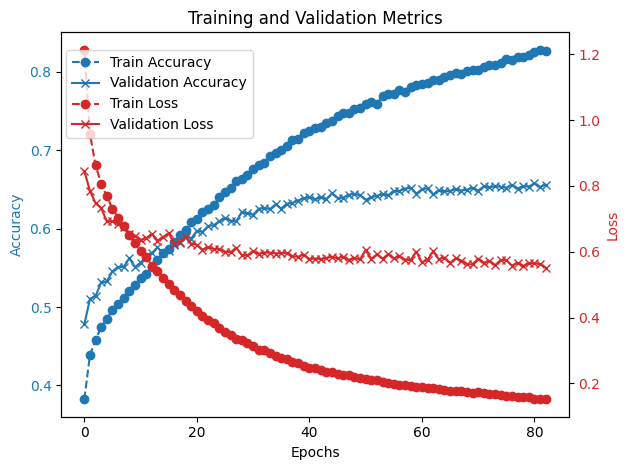

In [42]:
##plot the loss

# Plotting
fig, ax1 = plt.subplots()

# Plotting accuracy on the first y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(train_acc_plot, label='Train Accuracy', color='tab:blue', linestyle='dashed', marker='o')
ax1.plot(valid_acc_plot, label='Validation Accuracy', color='tab:blue', marker='x')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(train_loss_plot, label='Train Loss', color='tab:red', linestyle='dashed', marker='o')
ax2.plot(valid_loss_plot, label='Validation Loss', color='tab:red', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title('Training and Validation Metrics')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

In [ ]:
max(valid_acc_plot)

In [44]:
import copy
orginnal_model=copy.deepcopy(model)

In [56]:
model=copy.deepcopy(orginnal_model)

In [66]:
model.load_state_dict(torch.load('./model_image.pth'))

<All keys matched successfully>

In [69]:
# Evaluation mode
model.eval()

# Lists to store predictions and labels
test_predictions = []
test_labels = []

# Test loop
for batch in tqdm(test_loader):
    inds_dec, masks_dec, inds_rev, masks_rev, i, rating = batch
    labels = rating.to(device).float()

    # Disable gradient computation during evaluation
    with torch.no_grad():
        logits = model(inds_dec.to(device), masks_dec.to(device), inds_rev.to(device), masks_rev.to(device), i.to(device)).float()

    # Record predictions and labels
    test_predictions.extend(logits.cpu().numpy())
    test_labels.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays
test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)

# Calculate accuracy
test_accuracy = np.sum(test_predictions.round() == test_labels) / len(test_labels)
print(f"Test Accuracy: {test_accuracy:.5f}")

import torch
import torch.nn as nn

# Assuming test_labels and test_predictions are NumPy arrays
test_labels_tensor = torch.from_numpy(test_labels)
test_predictions_tensor = torch.from_numpy(test_predictions)

# Convert to torch tensors if they are not already
criterion = nn.MSELoss()

# Calculate MSE
mse_loss = criterion(test_predictions_tensor.float(), test_labels_tensor.float())

# Convert MSE to a Python number
mse_value = mse_loss.item()

print(f"Mean Squared Error (MSE): {mse_value:.5f}")


100%|████████████████████████████████████████████████████████████████████████████████| 586/586 [01:25<00:00,  6.84it/s]

Test Accuracy: 0.66004
Mean Squared Error (MSE): 0.54597


Mean Squared Error (MSE): 0.55176


In [62]:
test_labels.shape

(9363,)